# Part I - Communicate Data: Ford GoBike System Data
## by (Derbew Felasman)

##  Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wra">Preliminary Wrangling</a></li>
<li><a href="#uni">Univariate Exploration</a></li>
<li><a href="#biv">Bivariate Exploration</a></li>
<li><a href="#multi"> Multivariate Exploration</a></li>  
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction
> This project has two parts that demonstrate the importance and value of data visualization techniques in the data analysis which is as Capstone project part of the Udacity Data Analysis Nanodegree course and the data set I selected for this project is `fordgobike_tripdata.csv`. This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The first part will be , Exploratory data visualization, I will use Python visualization libraries to systematically explore `fordgobike_tripdata.csv` dataset, starting from plots of single variables and building up to plots of multiple variables.
The second part will be, Explanatory data visualization, I will produce a short presentation that illustrates interesting properties, trends, and relationships that I discovered in my `fordgobike_tripdata.csv` dataset. The primary method of conveying my findings will be through transforming my exploratory visualizations from the first part into polished, explanatory visualizations.


 





<a id='wra'></a>
## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Data Gathering

Directly download the ford go bike trip data (fordgobike_tripdata.csv)

In [2]:
#convert csv file to pandas dataframe
gobike_df = pd.read_csv('fordgobike_tripdata.csv')

### Assessing Data

#### Visual assessment

In [3]:

gobike_df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


- Some column contain NaN values
- `start_time` and `end_time` contains multiple values in one column

#### Programmatic Assesement

In [4]:
gobike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

- Some Columns contains NaN values(start_station_id, start_station_name, end_station_id, end_station_name, member_birth_yeay, member_gender)
- start_time, end_time, start_station_id, end_station_id, user_type, member_gender, and member_birth_year columns contain erroneous datatype


In [5]:
#check duplicated values in gobike_df dataframe
sum(gobike_df.duplicated())

0

#### Quality issues

1. Some Columns contains NaN values(start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender)
2. start_time, end_time, start_station_id, end_station_id, user_type, member_gender and member_birth_year columns contain erroneous datatype
3. Delete unnecessary columns(start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude, and bike_share_for_all_trip)
4. start_time and end_time contains multiple values in one column
5. Add a new column for age from member_birth_year


### Cleaning Data

In [6]:
# Make copies of original pieces of data
gobike_df_clean = gobike_df.copy()

##### Issue #1:
> Some Columns contains NaN values(start_station_id, start_station_name, end_station_id, end_station_name, member_birth_yeay, member_gender)

##### Define:
> I used `dropna` function to drop rows that has a NaN values

##### Code

In [7]:
#Drop the rows with missing values
gobike_df_clean.dropna(inplace=True)

##### Test

In [8]:
gobike_df_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

##### Issue #2:
> start_time, end_time, start_station_id, end_station_id, bike_id, user_type, member_gender, and member_birth_year columns contain erroneous datatype

##### Define:
> I used `astype` function to change the columns containing erroneous datatype


##### Code

In [9]:
gobike_df_clean['start_time'] = pd.to_datetime(gobike_df_clean['start_time'])
gobike_df_clean['end_time'] = pd.to_datetime(gobike_df_clean['end_time'])
gobike_df_clean['start_station_id'] = gobike_df_clean['start_station_id'].astype('int')
gobike_df_clean['end_station_id'] = gobike_df_clean['end_station_id'].astype('int')
gobike_df_clean['user_type'] = gobike_df_clean['user_type'].astype('category')
gobike_df_clean['member_birth_year'] = gobike_df_clean['member_birth_year'].astype('int')
gobike_df_clean['member_gender'] = gobike_df_clean['member_gender'].astype('category')

##### Test

In [10]:
# check datatypes
gobike_df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                   int64
member_gender                    category
bike_share_for_all_trip            object
dtype: object

##### Issue #3:
>Delete unnecessary columns(start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude, and bike_share_for_all_trip)

##### Define:
> I used `drop` function to drop unnecessary columns

##### Code

In [11]:
droped_cols = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'bike_share_for_all_trip']
gobike_df_clean.drop(droped_cols, axis=1, inplace=True);

##### Test

In [12]:
# check for the deleted columns
list(gobike_df_clean)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'end_station_id',
 'end_station_name',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender']

##### Issue #4:
`start_time` and `end_time` contains multiple values in one column

##### Define
Split the `start_time` and into indvidual columns like start_date, start_hourofday, start_dayofweek, start_month and for `end_time` end_date, end_hourofday, end_dayofweek, and end_month. To do this I use `strftime` function.

##### Code

In [13]:
# for start_time
gobike_df_clean['start_date'] = gobike_df_clean['start_time'].dt.strftime('%Y-%m-%d')
gobike_df_clean['start_hourofday'] = gobike_df_clean['start_time'].dt.strftime('%H')
gobike_df_clean['start_dayofweek'] = gobike_df_clean['start_time'].dt.strftime('%A')
gobike_df_clean['start_month'] = gobike_df_clean['start_time'].dt.strftime('%B')

#for end_time
gobike_df_clean['end_date'] = gobike_df_clean['end_time'].dt.strftime('%Y-%m-%d')
gobike_df_clean['end_hourofday'] = gobike_df_clean['end_time'].dt.strftime('%H')
gobike_df_clean['end_dayofweek'] = gobike_df_clean['end_time'].dt.strftime('%A')
gobike_df_clean['end_month'] = gobike_df_clean['end_time'].dt.strftime('%B')

##### Test

In [14]:
gobike_df_clean.sample(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,start_date,start_hourofday,start_dayofweek,start_month,end_date,end_hourofday,end_dayofweek,end_month
115665,281,2019-02-12 08:34:18.623,2019-02-12 08:39:00.255,26,1st St at Folsom St,24,Spear St at Folsom St,1453,Subscriber,1982,Female,2019-02-12,08,Tuesday,February,2019-02-12,08,Tuesday,February
106431,117,2019-02-13 18:17:41.196,2019-02-13 18:19:38.778,19,Post St at Kearny St,21,Montgomery St BART Station (Market St at 2nd St),3189,Subscriber,1972,Male,2019-02-13,18,Wednesday,February,2019-02-13,18,Wednesday,February
2374,585,2019-02-28 18:06:56.001,2019-02-28 18:16:41.300,312,San Jose Diridon Station,311,Paseo De San Antonio at 2nd St,2642,Subscriber,1974,Male,2019-02-28,18,Thursday,February,2019-02-28,18,Thursday,February


##### issue #5:
> Add a new column for age from member_birth_year

##### Define
> Create a new column for members age from member_birth_year

##### Code

In [15]:
gobike_df_clean['age'] = 2019 - gobike_df_clean['member_birth_year']

##### Test

In [16]:
gobike_df_clean.sample(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,start_date,start_hourofday,start_dayofweek,start_month,end_date,end_hourofday,end_dayofweek,end_month,age
105445,219,2019-02-14 06:35:37.777,2019-02-14 06:39:17.653,62,Victoria Manalo Draves Park,64,5th St at Brannan St,6525,Subscriber,1994,Male,2019-02-14,06,Thursday,February,2019-02-14,06,Thursday,February,25
35200,1650,2019-02-23 19:05:58.777,2019-02-23 19:33:29.563,6,The Embarcadero at Sansome St,10,Washington St at Kearny St,5413,Customer,1998,Male,2019-02-23,19,Saturday,February,2019-02-23,19,Saturday,February,21
8636,145,2019-02-28 08:18:12.610,2019-02-28 08:20:38.252,230,14th St at Mandela Pkwy,160,West Oakland BART Station,4869,Subscriber,1988,Male,2019-02-28,08,Thursday,February,2019-02-28,08,Thursday,February,31


### Storing Data

Save gathered, assessed, and cleaned dataset to `gobike_df_clean.csv`

In [17]:
# store the cleaned data into gobike_df_clean.csv
gobike_df_clean.to_csv('gobike_df_clean.csv', index=False)

In [18]:
gobike_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   duration_sec        174952 non-null  int64         
 1   start_time          174952 non-null  datetime64[ns]
 2   end_time            174952 non-null  datetime64[ns]
 3   start_station_id    174952 non-null  int64         
 4   start_station_name  174952 non-null  object        
 5   end_station_id      174952 non-null  int64         
 6   end_station_name    174952 non-null  object        
 7   bike_id             174952 non-null  int64         
 8   user_type           174952 non-null  category      
 9   member_birth_year   174952 non-null  int64         
 10  member_gender       174952 non-null  category      
 11  start_date          174952 non-null  object        
 12  start_hourofday     174952 non-null  object        
 13  start_dayofweek     174952 no

### What is the structure of your dataset?

> After cleaning the dataset it has 174952 rows and 20 columns (duration_sec, start_time, end_time, start_station_id, start_station_name, end_station_id, end_station_name, bike_id, user_type, member_birth_year, member_gender, start_date, start_hourofday, start_dayofweek, start_month, end_date, end_hourofday, end_dayofweek, end_month, and	age ). The data type of the variables are 2 category, 2 datetime, 6 numerical, and 10 of them are object.

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest in this dataset are `duration_sec`, `start_hourofday`, `start_dayofweek`, `user_type`, `age`, `start_station`, `end_station`, and `member_gender` from the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that duration will have the strongest effect on each the start_stations and end_stations because the crowded places should receive more rides. I also think that `user_type`, `age`, `start_date`, `start_hourofday`, `start_dayofweek`, `start_month`, and `member_gender` will have effects on trip duration.

<a id='uni'></a>
## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


How is the distribution of trip durations?

/tmp/ipykernel_16233/470212783.py:11: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([0, 10000, 0, 15000]);


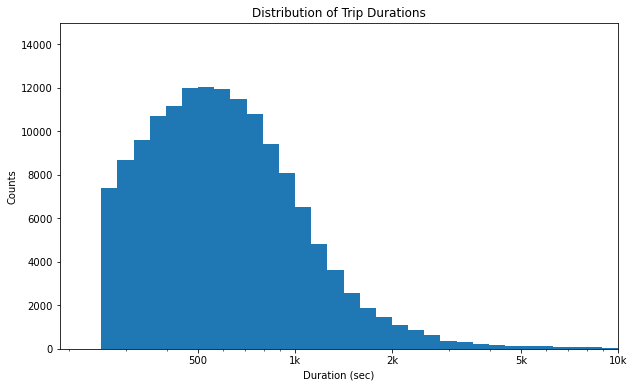

In [19]:
# plot a histogram with logarithmic scale transformation
plt.figure(figsize=[10,6])
base_color = sns.color_palette()[0]
bins = 10 ** np.arange(2.4, np.log10(gobike_df_clean['duration_sec'].max()) + 0.05, 0.05)
plt.hist(data = gobike_df_clean, x = 'duration_sec', bins = bins, color = base_color)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (sec)')
plt.ylabel('Counts')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k']);
plt.axis([0, 10000, 0, 15000]);

As we see from the above histogram most rides took about (100 - 1500) seconds.

What are the most top ten start stations?

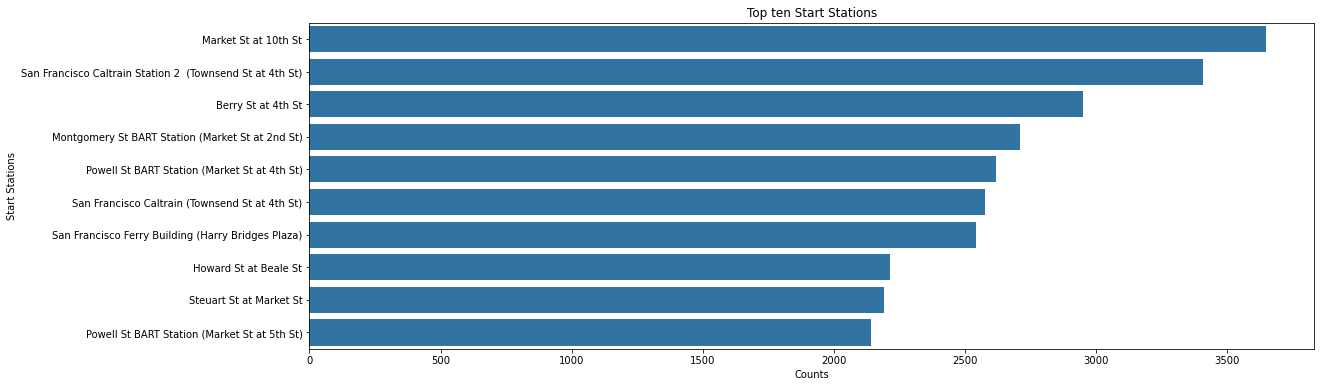

In [20]:
plt.figure(figsize=[18,6])
base_color = sns.color_palette()[0]
orders = gobike_df_clean['start_station_name'].value_counts().index[:10]
sns.countplot(data = gobike_df_clean, y = 'start_station_name', color = base_color, order = orders);
plt.title("Top ten Start Stations")
plt.xlabel("Counts")
plt.ylabel("Start Stations");

As We can see from the analysis result `Market St at 10th St` and `Berry St at 4th St` were the most common start stations.

What are the most top ten end stations?

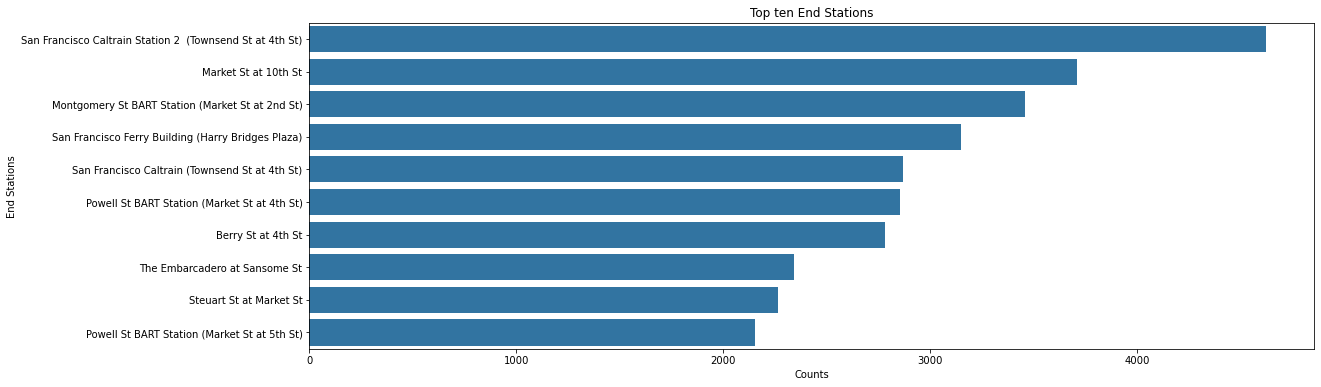

In [21]:
plt.figure(figsize=[18,6])
base_color = sns.color_palette()[0]
orders = gobike_df_clean['end_station_name'].value_counts().index[:10]
sns.countplot(data = gobike_df_clean, y = 'end_station_name', color = base_color, order = orders);
plt.title("Top ten End Stations")
plt.xlabel("Counts")
plt.ylabel("End Stations");

As We can see from the analysis result `San Francisco Caltrain Station 2 - Townsend St at 4th St` and `Market St at 10th St` were the most common start stations.

In which hours of the day have the most rides start?

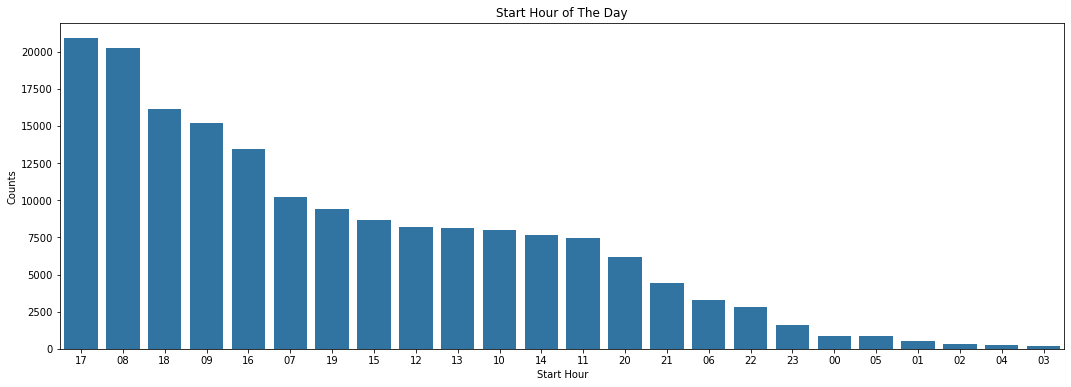

In [30]:
plt.figure(figsize=[18,6])
base_color = sns.color_palette()[0]
orders = gobike_df_clean['start_hourofday'].value_counts().index
sns.countplot(data = gobike_df_clean, x = 'start_hourofday', color = base_color, order = orders);
plt.title("Start Hour of The Day")
plt.ylabel("Counts")
plt.xlabel("Start Hour");

The result show that 5 PM and 8 AM are the most busy hours.

In which days of the week have the most rides start?

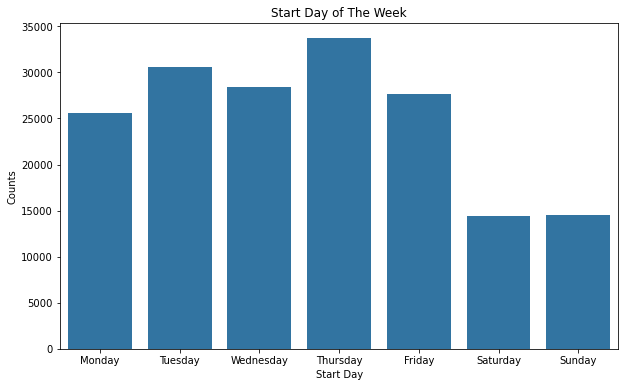

In [23]:
plt.figure(figsize=[10,6])
base_color = sns.color_palette()[0]
orders = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sns.countplot(data = gobike_df_clean, x = 'start_dayofweek', color = base_color, order = orders);
plt.title("Start Day of The Week")
plt.ylabel("Counts")
plt.xlabel("Start Day");

As we see from the above bar chart the bikers have higher rides at the weekday more than the weekend and Thursday is the highest day of rides. 

What is the age distribution of the bikers?

In [47]:
df_age = gobike_df_clean.query('age <= 80')

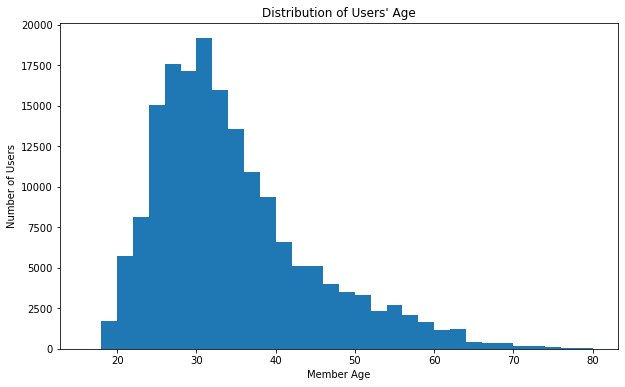

In [50]:
plt.figure(figsize=[10,6])
base_color = sns.color_palette()[0]
bins = np.arange(16, df_age['age'].max() + 2, 2)
plt.hist(data = df_age, x = 'age', color = base_color, bins = bins);
plt.title("Distribution of Users' Age")
plt.xlabel('Member Age')
plt.ylabel('Number of Users');

Based on the result, we can see that the distribution is more concentrated between 20 to 40 years old.

What is the user type distributions?

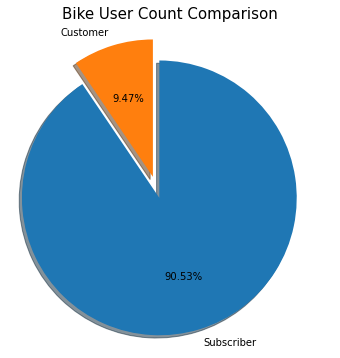

In [60]:
plt.figure(figsize=(10,6))
explode = (0.16, 0)
user_counts = gobike_df_clean['user_type'].value_counts()
plt.pie(user_counts, labels = user_counts.index, startangle = 90, counterclock = False, autopct='%1.2f%%', explode = explode, shadow=True);
plt.title('Bike User Count Comparison', fontsize=15);
plt.axis('square');

The pie chart result shows that the majority of the user type are Subscribers.

What is the member gender distributions?

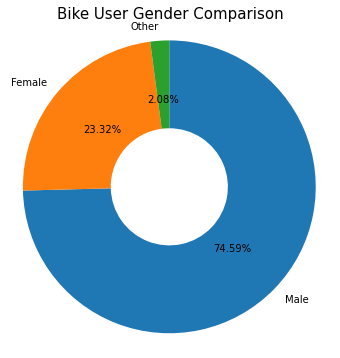

In [65]:
plt.figure(figsize=(10,6))
gender_counts = gobike_df_clean['member_gender'].value_counts()
plt.pie(gender_counts, labels = gender_counts.index, startangle = 90, counterclock = False, autopct='%1.2f%%', wedgeprops = {'width' : 0.6});
plt.title('Bike User Gender Comparison', fontsize=15);
plt.axis('square');

Dount plot result show that the majority of the user are male.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
> - The most rides took about (100 - 1500) seconds.
> - The majority of the user type are Subscribers.
> - 5 PM and 8 AM are the most busy hours.
> - The majority of the user are male.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>  - The hour of the day and the day of the week were extracted from the start time.
>  - The age of the users is calculated using the member_birth_year.

<a id='biv'></a>
## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Is there any relationship between duration_sec and member age?

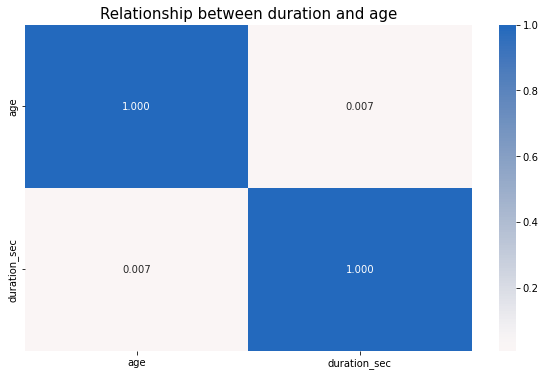

In [74]:
plt.figure(figsize=[10,6])
vars = ['age', 'duration_sec']
df_age = gobike_df_clean.query('age <= 80')
sns.heatmap(df_age[vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);
plt.title('Relationship between duration and age', fontsize = 15);

The heatmap plot show that there is week relationship between age and duration

Is there any relationship between duration_sec and User type?

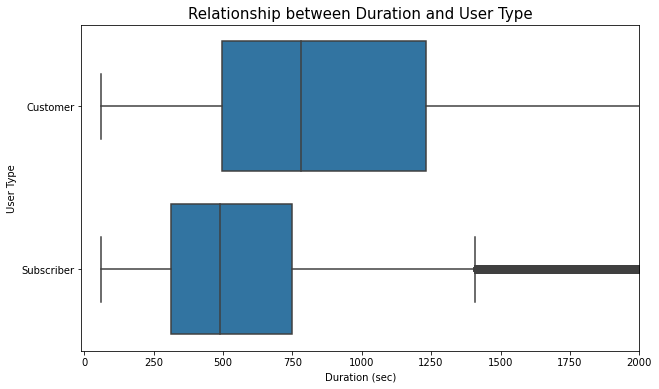

In [83]:
plt.figure(figsize=[10,6])
base_color = sns.color_palette()[0]
sns.boxplot(data = gobike_df_clean, x = 'duration_sec', y = 'user_type', color = base_color)
plt.title('Relationship between Duration and User Type', fontsize = 15);
plt.xlabel("Duration (sec)")
plt.ylabel("User Type");
plt.xlim([-10, 2000]);

As we can see that higher percentage of customer rides longer durations than subscriber.

Is there any relationship between duration_sec and Member Gender?

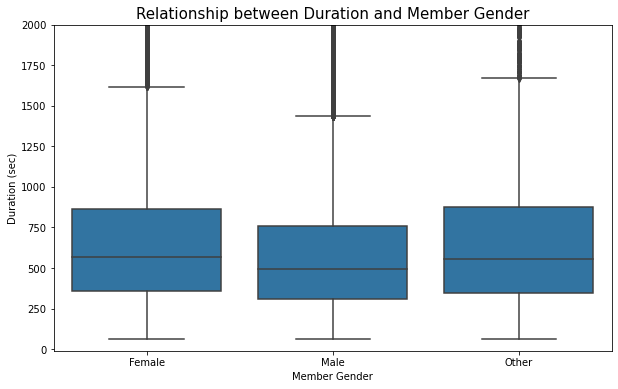

In [84]:
plt.figure(figsize=[10,6])
base_color = sns.color_palette()[0]
sns.boxplot(data = gobike_df_clean, y = 'duration_sec', x = 'member_gender', color = base_color)
plt.title('Relationship between Duration and Member Gender', fontsize = 15);
plt.ylabel("Duration (sec)")
plt.xlabel("Member Gender");
plt.ylim([-10, 2000]);

As we can see from the box plot there is higher percentage of female and other rides longer trips then males.

Is there any relationship between duration_sec and day of week?

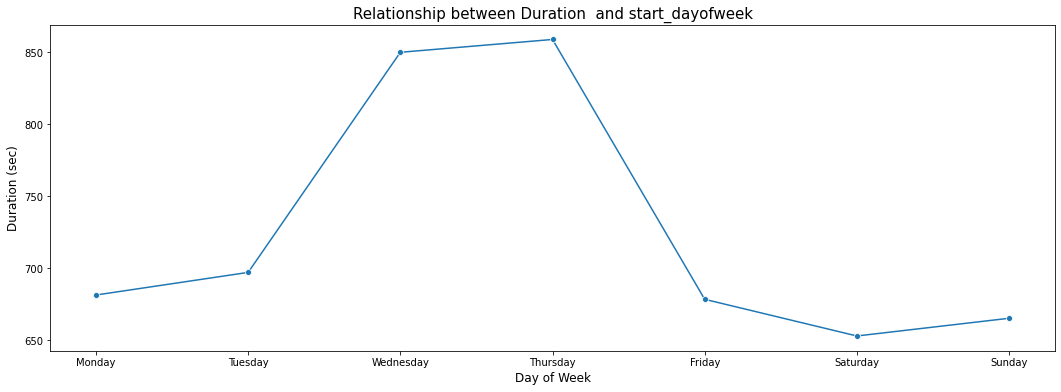

In [96]:
week_avg = gobike_df_clean.groupby('start_dayofweek').duration_sec.mean()
plt.figure(figsize=[18,6])
sns.lineplot(x = week_avg.index, y = week_avg, marker='o')
plt.xticks(np.arange(0,7), orders)
plt.title('Relationship between Duration  and start_dayofweek', fontsize = 15)
plt.xlabel('Day of Week', fontsize = 12);
plt.ylabel('Duration (sec)', fontsize = 12);

As we see from the plot from Tuesday to Friday leasted longer than other days.

Is there any relationship between User type and day of week?

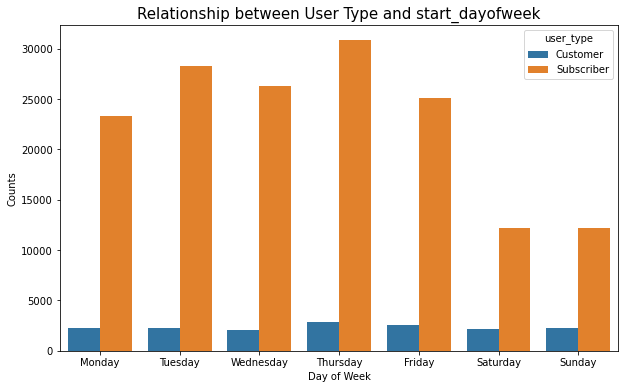

In [92]:
plt.figure(figsize=[10,6])

sns.countplot(data = gobike_df_clean, x = 'start_dayofweek', hue = 'user_type', order = orders)
plt.title('Relationship between User Type and start_dayofweek', fontsize = 15)
plt.xlabel('Day of Week');
plt.ylabel('Counts');

The plot result shows that Subscribers mostly used bikes on workdays (Monday - Friday), while customers bikes usage was about the same for the whole week with a slight increment on Thursday and Friday.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> - There is higher percentage of customer rides longer durations than subscriber.
> - There is higher percentage of female and other rides longer trips then males.
> - Tuesday to Friday has longer durations than other days.
> - Subscribers mostly used bikes on weekdays Monday - Friday, while customers bikes usage was about the same for the whole week with a slight increment on Thursday and Friday.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No

<a id='multi'></a>
## Multivariate Exploration


How does the duration vary in weekdays between Member Gender?

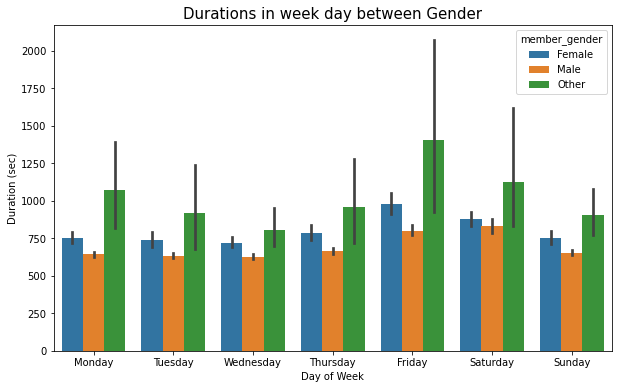

In [117]:
plt.figure(figsize=[10,6])
sns.barplot(data = gobike_df_clean, x='start_dayofweek', y='duration_sec', hue='member_gender')
plt.xticks(np.arange(0,7), orders)
plt.title("Durations in week day between Gender", fontsize=15)
plt.xlabel("Day of Week")
plt.ylabel('Duration (sec)');


The above clustered barchart shows there is a higher duration on Friday and Saterday by the members that have other gender. Next a members who are a female has relatively higher duration on Friday and Saterday. 

How does the duration vary in weekdays between User types?

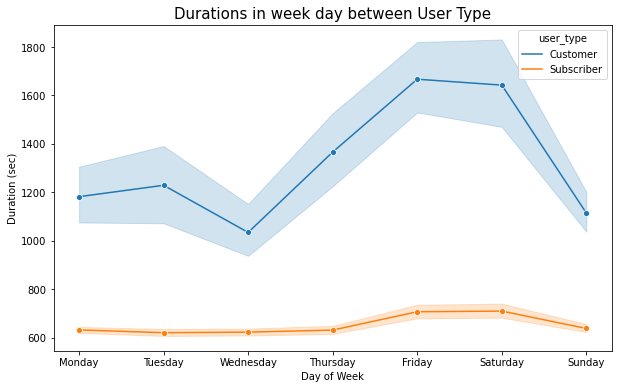

In [115]:
plt.figure(figsize=[10,6])
sns.lineplot(data = gobike_df_clean, x='start_dayofweek', y='duration_sec', hue='user_type', marker='o')
plt.xticks(np.arange(0,7), orders)
plt.title("Durations in week day between User Type", fontsize=15)
plt.xlabel("Day of Week")
plt.ylabel('Duration (sec)');

The line plot shows Customers have a higher durations during the weekend.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> - There is higher duration on Friday and Saterday by the members that have other gender
> - Customers have a higher durations during the weekend

### Were there any interesting or surprising interactions between features?

> Yes, customers were more likely to use bikes for a longer period than subscribers.

<a id='conclusions'></a>
## Conclusions
> I observed that The most rides took about (100 - 1500) seconds, The majority of the user type are Subscribers but Customer bikers spend more time riding a bike in comparison of Subscribe bikers, 5 PM and 8 AM are the most busy hours, Males are more likley to bike (Males constitue the majority of the dataset by 74%, females constitue just 23%, and others constitue 2%) despite the fact that Others and females tend to spend more duration per a trip.
In genral the multivariate exploration strengthened some of the patterns discovered in the previous bivariate exploration as well as univariate exploration, the relationship between the multiple variables plotted are visualized altogether and information are presented combined. 


## References

* [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)
* [Numpy Documentation](https://numpy.org/doc/stable/)
* [Matplotlib Documentation](https://matplotlib.org/stable/tutorials/index.html#)
* [Seaborn Documentation](https://seaborn.pydata.org/tutorial.html)
* [DataVisualization](https://classroom.udacity.com/nanodegrees/nd002-alg-t2/parts/cd0016)
* [Data Wrangling](https://classroom.udacity.com/nanodegrees/nd002-alg-t2/parts/cd0015)